In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

### MNIST

In [2]:
mnist = fetch_openml("mnist_784", version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
# Making the datasets

In [5]:
X = mnist["data"]
y = mnist["target"]

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
type(X)

numpy.ndarray

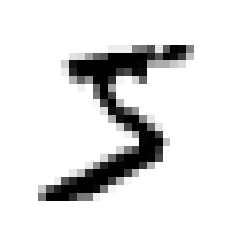

In [10]:
first_digit = X[0]
first_digit_image = first_digit.reshape(28, 28)
plt.imshow(first_digit_image, cmap="binary")
plt.axis("off");

In [11]:
y[0]

'5'

In [12]:
y = y.astype(np.uint8)

In [13]:
# Creating Test Set and Training Set

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [15]:
X_train.shape

(60000, 784)

In [16]:
import sklearn

In [17]:
print(sklearn.__version__)

0.21.1


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [38]:
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
nb_clf = MultinomialNB()
knn_clf = KNeighborsClassifier()

In [20]:
# Checking the accuracy of the Multiple classifiers on the dataset

In [21]:
from sklearn.model_selection import cross_val_score

In [23]:
rf_cv_score = cross_val_score(rf_clf, X_train, y_train, cv=2, scoring="accuracy")
lr_cv_score = cross_val_score(lr_clf, X_train, y_train, cv=2, scoring="accuracy")
dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=2, scoring="accuracy")
nb_cv_score = cross_val_score(nb_clf, X_train, y_train, cv=2, scoring="accuracy")

C:\Users\dell\miniconda3\envs\Machinelearningenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\miniconda3\envs\Machinelearningenv\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\dell\miniconda3\envs\Machinelearningenv\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\dell\miniconda3\envs\Machinelearningenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\

In [39]:
knn_cv_score = cross_val_score(knn_clf, X_train, y_train, cv=2, scoring="accuracy")

C:\Users\dell\miniconda3\envs\Machinelearningenv\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\dell\miniconda3\envs\Machinelearningenv\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\dell\miniconda3\envs\Machinelearningenv\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\dell\miniconda3\envs\Machinelearningenv\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_

In [40]:
accuracy_dict = {
    "Random Forest Accuracy": rf_cv_score,
    "Logistic Regression Accuracy": lr_cv_score,
    "Decision Tree Accuracy": dt_cv_score,
    "Naive Bayes Accuracy": nb_cv_score,
    "KNN Accuracy": knn_cv_score
}

In [42]:
accuracy_dataframe = pd.DataFrame(accuracy_dict, index=[0,1])

In [43]:
accuracy_dataframe

,Random Forest Accuracy,Logistic Regression Accuracy,Decision Tree Accuracy,Naive Bayes Accuracy,KNN Accuracy
0,0.93434,0.901543,0.847949,0.818518,0.96337
1,0.93766,0.903990,0.847118,0.829250,0.96393


In [44]:
# Checking out the confusion Matrix

In [45]:
from sklearn.model_selection import cross_val_predict

In [49]:
# Cross Val pred gives us predictions after performing k-fold cross validation

In [50]:
rf_pred = cross_val_predict(rf_clf, X_train, y_train, cv=3)
lr_pred = cross_val_predict(lr_clf, X_train, y_train, cv=3)
dt_pred = cross_val_predict(dt_clf, X_train, y_train, cv=3)
nb_pred = cross_val_predict(nb_clf, X_train, y_train, cv=3)
knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

C:\Users\dell\miniconda3\envs\Machinelearningenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\miniconda3\envs\Machinelearningenv\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\dell\miniconda3\envs\Machinelearningenv\lib\site-packages\sklearn\utils\fixes.py:223: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\dell\miniconda3\envs\Machinelearningenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dell\

In [51]:
from sklearn.metrics import confusion_matrix
rf_confusion_matrix = confusion_matrix(y_train, rf_pred)
lr_confusion_matrix = confusion_matrix(y_train, lr_pred)
dt_confusion_matrix = confusion_matrix(y_train, dt_pred)
nb_confusion_matrix = confusion_matrix(y_train, nb_pred)
knn_confusion_matrix = confusion_matrix(y_train, knn_pred)

In [72]:
# Plotting only Random Forest and K nearest Neighbours as they have the best accuracy

Random Forest Confusion Matrix: 


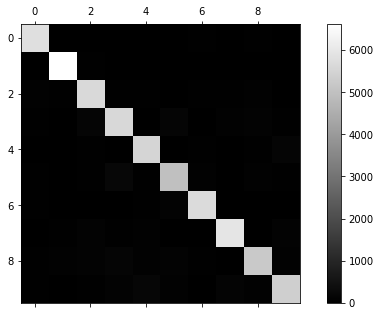

In [70]:
print("Random Forest Confusion Matrix: ")
plt.figure(figsize=(10,5))
plt.matshow(rf_confusion_matrix, fignum=1, cmap=plt.cm.gray);
plt.colorbar();

KNN Confusion Matrix: 


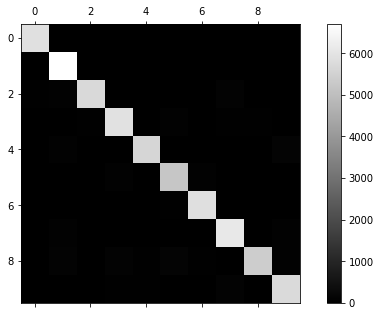

In [71]:
print("KNN Confusion Matrix: ")
plt.figure(figsize=(10,5))
plt.matshow(knn_confusion_matrix, fignum=1, cmap=plt.cm.gray);
plt.colorbar();

In [73]:
from sklearn.metrics import classification_report
rf_classification_report = classification_report(y_train, rf_pred)
knn_classification_report = classification_report(y_train, knn_pred)

In [82]:
print("Random Forest Classification Report:")
print(rf_classification_report)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5923
           1       0.97      0.98      0.98      6742
           2       0.92      0.94      0.93      5958
           3       0.91      0.91      0.91      6131
           4       0.93      0.95      0.94      5842
           5       0.92      0.92      0.92      5421
           6       0.96      0.96      0.96      5918
           7       0.96      0.95      0.95      6265
           8       0.93      0.89      0.91      5851
           9       0.93      0.90      0.92      5949

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000



In [83]:
print("K nearest neighbours Classification Report:")
print(knn_classification_report)

K nearest neighbours Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5923
           1       0.95      0.99      0.97      6742
           2       0.98      0.96      0.97      5958
           3       0.96      0.96      0.96      6131
           4       0.98      0.96      0.97      5842
           5       0.96      0.96      0.96      5421
           6       0.98      0.99      0.98      5918
           7       0.96      0.97      0.97      6265
           8       0.98      0.92      0.95      5851
           9       0.95      0.96      0.95      5949

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000



In [84]:
# Using Decision Functions to get Precision and Recall